1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [108]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

##### Reading DataFtam:

In [109]:
import pandas as pd

df = pd.read_csv('data_000637.txt', sep=',')
print(df)

         HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
0           1     0          123  3869200167        2374        26
1           1     0          124  3869200167        2374        27
2           1     0           63  3869200167        2553        28
3           1     0           64  3869200167        2558        19
4           1     0           64  3869200167        2760        25
...       ...   ...          ...         ...         ...       ...
1310715     1     0           62  3869211171         762        14
1310716     1     1            4  3869211171         763        11
1310717     1     0           64  3869211171         764         0
1310718     1     0          139  3869211171         769         0
1310719     1     0           61  3869211171         762        18

[1310720 rows x 6 columns]


##### Df index between [10001 : Df length]

In [110]:
length = df.shape[0]
df.iloc[10001 : length]

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
10001,1,0,47,3869200267,785,14
10002,1,0,63,3869200267,921,28
10003,1,0,64,3869200267,924,15
10004,1,0,7,3869200267,998,22
10005,1,0,8,3869200267,998,12
...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [111]:
print("BX No. in Orbit", max(df["BX_COUNTER"]) + 1)

BX No. in Orbit 3564


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [112]:
def AbsoluteTimeColumn():
    bxCounter = max(df["BX_COUNTER"]) + 1
    newBxCounter = df['BX_COUNTER'] * 25
    newTDCMeas = df['TDC_MEAS'] * (25 / 30)
    newOrbitCNT = df['ORBIT_CNT'] * (bxCounter * 25)
    return df.assign(ABSOLUTE_TIME = newBxCounter + newTDCMeas + newOrbitCNT)
AbsoluteTimeColumn()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,ABSOLUTE_TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
1310715,1,0,62,3869211171,762,14,3.447467e+14
1310716,1,1,4,3869211171,763,11,3.447467e+14
1310717,1,0,64,3869211171,764,0,3.447467e+14
1310718,1,0,139,3869211171,769,0,3.447467e+14


4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [113]:
import datetime as dt

startTime = dt.datetime.now()
print("The start time is :", startTime)
AbsoluteTimeColumn()
finishTime = dt.datetime.now()
print("The Finish time is :", finishTime)
print("The time difference is :", (finishTime - startTime))

The start time is : 2022-12-02 19:30:59.415132
The Finish time is : 2022-12-02 19:30:59.541174
The time difference is : 0:00:00.126042


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [114]:
noisy_channels = df.groupby('TDC_CHANNEL')['ORBIT_CNT'].count().sort_values(ascending = False)
noisy_channels.iloc[0:3]

TDC_CHANNEL
139    108059
64      66020
63      64642
Name: ORBIT_CNT, dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [115]:
count = df["ORBIT_CNT"].unique().size
print("The number of non-empty orbits is " + str(count))

The number of non-empty orbits is 11001


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [116]:
SPC_TDC_CHANNEL = 139
uniqueOrbits = pd.DataFrame(df[df['TDC_CHANNEL'] == SPC_TDC_CHANNEL]).drop_duplicates(subset=['ORBIT_CNT'], inplace=False)
print("The number of unique orbits with at least one measurement from TDC_CHANNEL = 139 is ", len(uniqueOrbits))

The number of unique orbits with at least one measurement from TDC_CHANNEL = 139 is  10976


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

##### FPGA_0:

In [117]:
FPGA_0 = df[df['FPGA'] == 0].groupby('TDC_CHANNEL').count()
FPGA_0

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS
TDC_CHANNEL,,,,,
1,1215,1215,1215,1215,1215
2,1602,1602,1602,1602,1602
3,1493,1493,1493,1493,1493
4,2352,2352,2352,2352,2352
5,1432,1432,1432,1432,1432
...,...,...,...,...,...
129,2,2,2,2,2
130,33,33,33,33,33
137,32,32,32,32,32


##### FPGA_1:

In [118]:
FPGA_1 = df[df['FPGA'] == 1].groupby('TDC_CHANNEL').count()
FPGA_1

,HEAD,FPGA,ORBIT_CNT,BX_COUNTER,TDC_MEAS
TDC_CHANNEL,,,,,
1,28438,28438,28438,28438,28438
2,32669,32669,32669,32669,32669
3,21970,21970,21970,21970,21970
4,26403,26403,26403,26403,26403
5,15003,15003,15003,15003,15003
...,...,...,...,...,...
129,35,35,35,35,35
130,38,38,38,38,38
137,36,36,36,36,36


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

Text(0, 0.5, 'Count')

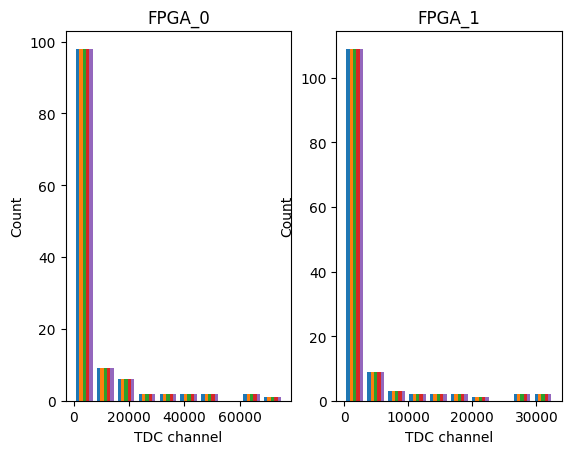

In [119]:
import matplotlib.pyplot as plt

fig, (fpga_0, fpga_1) = plt.subplots(1, 2)

fpga_0.hist(FPGA_0) ##create histogtram
fpga_0.set_title('FPGA_0')
fpga_0.set_xlabel('TDC channel')
fpga_0.set_ylabel('Count')

fpga_1.hist(FPGA_1)
fpga_1.set_title('FPGA_1')
fpga_1.set_xlabel('TDC channel')
fpga_1.set_ylabel('Count')